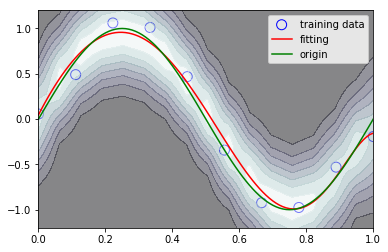

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
#from mpl_toolkits.mplot3d import Axes3D
#fig = plt.figure()
#ax = fig.gca(projection='3d')

#BETA the scale of f
BETA = 11.1
#ALPHA the scale of weight
ALPHA = .005
#order of polynomial (M+1)
M = 10

#for gradient descent
weight = np.zeros(M)
wlr = np.zeros(M)
r = 1.0
n = 50000

def f(xn, w):
    sum = 0.0
    for i in range(len(w)):
        sum += xn**i * w[i]
    return sum

def GradientDescent(x_data, t_data):
    for k in range(n):
        for i in range(M):
            dw = 0.0
            for j in range(len(x_data)):
                #derivate of sum-square-error 
                dw += BETA * (x_data[j]**i) * (f(x_data[j],weight) - t_data[j])
            #ragularization
            dw += ALPHA * weight[i]
            #adagrad
            wlr[i] += dw**2
            weight[i] = weight[i] - r / (wlr[i]**(0.5)) * dw


def Phi(x):
    arr=np.zeros(M)
    for i in range(M):
        arr[i] = x**i
    return arr.reshape((M,1))
        
def BuildS(x, x_arr):
    I = np.identity(M)
    Sum = np.zeros(I.shape)
    for k in range(len(x_arr)):
        Sum += np.matmul(Phi(x_arr[k]), Phi(x_arr[k]).T)
    S = ALPHA * I + BETA * Sum
    return np.linalg.inv(S)

def Normal(x, x_arr, t_arr):
    S = BuildS(x, x_arr)
    Sum = np.zeros(M).reshape((M,1))
    for k in range(len(x_arr)):
        Sum += Phi(x_arr[k]) * t_arr[k]
    mu = BETA * np.matmul(np.matmul(Phi(x).T, S), Sum)
    sigma = 1.0/BETA + np.matmul(np.matmul(Phi(x).T, S) , Phi(x))
    return mu, sigma

def Distribution(x_data, t_data):
    x = np.linspace(0, 1.2, 20)
    y = np.linspace(-1.2, 1.2, 40)
    Z = np.zeros((len(x), len(y)))
    X, Y = np.meshgrid(x,y)
    for i in range(len(x)):
        mu, sigma = Normal(x[i], x_data, t_data)
        Z[i] = 1.0/(np.sqrt(2 * np.pi * sigma)) * np.exp(-(y-mu)**2 / (2 * sigma))
    plt.contourf(X,Y, Z.T, cmap=cm.bone, alpha=.5)
    #ax.plot_surface(X.T,Y.T, Z00)
    
def main():
    x_data = np.linspace(0,1,10)
    noise = np.random.normal(loc=0,scale=.1, size=x_data.shape)
    t_data = np.sin(2*np.pi*x_data) + noise
    #t_data = x_data
    points = plt.scatter(x_data,t_data, s=100, facecolors='none', edgecolors='blue', label='training data')

    GradientDescent(x_data, t_data)
    Distribution(x_data, t_data)

    x_dense = np.arange(0,1.2,.01)
    curve_fitting = f(x_dense,weight)
    curve_origin  = np.sin(2*np.pi*x_dense)
    fitting, = plt.plot(x_dense, curve_fitting, color='red', label='fitting')
    origin,  = plt.plot(x_dense, curve_origin, color='green', label='origin')
    plt.legend(handles=[points, fitting, origin])
    plt.xlim(0,1)
    plt.ylim(-1.2,1.2)
    plt.show()
    
if __name__ == "__main__":
    main()